<a href="https://colab.research.google.com/github/nhv3/Master-Control-230/blob/master/Master_Notebook_CNN_V2_CS230_R4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
##VERSION 2.0 R3 - CARTWRIGHT
# Added keract visualization
# Only works with tensorflow 1

In [1]:
# Click on the URL link it gives you to mount the drive 
##NEW change comment to test git push
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/My Drive/CS230 Project/Data

/content/drive/My Drive/CS230 Project/Data


In [0]:
#Import the right libraries 
import pandas as pd 
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pathlib
from distutils.dir_util import copy_tree
import os
import random
import shutil

In [0]:
#data_dir_train = pathlib.Path('/content/drive/My Drive/CS230 Project/Data/train_images')
#data_dir_val = pathlib.Path('/content/drive/My Drive/CS230 Project/Data/val_images')
#data_dir_test = pathlib.Path('/content/drive/My Drive/CS230 Project/Data/test_images')

# Declare all the COVID image paths
trainCOVID_dir = "/content/drive/My Drive/CS230 Project/Data/train_images/COVID"
valCOVID_dir = "/content/drive/My Drive/CS230 Project/Data/val_images/COVID"
testCOVID_dir = "/content/drive/My Drive/CS230 Project/Data/test_images/COVID"

trainNONCOVID_dir = "/content/drive/My Drive/CS230 Project/Data/train_images/NON_COVID"
valNONCOVID_dir = "/content/drive/My Drive/CS230 Project/Data/val_images/NON_COVID"
testNONCOVID_dir = "/content/drive/My Drive/CS230 Project/Data/test_images/NON_COVID"

# Declare paths
covid_dir = "/content/drive/My Drive/CS230 Project/Data/COVID"
noncovid_dir ="/content/drive/My Drive/CS230 Project/Data/Non-COVID"
train_dir = "/content/drive/My Drive/CS230 Project/Data/Sets/Training"
sets_dir = "/content/drive/My Drive/CS230 Project/Data/Sets/"
train_dir_cov = "/content/drive/My Drive/CS230 Project/Data/Sets/Training/COVID"
train_dir_ncov = "/content/drive/My Drive/CS230 Project/Data/Sets/Training/Non-COVID"
dev_dir = "/content/drive/My Drive/CS230 Project/Data/Sets/Dev"
dev_dir_cov = "/content/drive/My Drive/CS230 Project/Data/Sets/Dev/COVID"
dev_dir_ncov = "/content/drive/My Drive/CS230 Project/Data/Sets/Dev/Non-COVID"
test_dir = "/content/drive/My Drive/CS230 Project/Data/Sets/Test"
test_dir_cov = "/content/drive/My Drive/CS230 Project/Data/Sets/Test/COVID"
test_dir_ncov = "/content/drive/My Drive/CS230 Project/Data/Sets/Test/Non-COVID"

In [5]:
#Check if Train/Dev/Test Sets are Populated
print('Total images in training covid set: ' + str(len(os.listdir(train_dir_cov)))) #expected: 132
print('Total images in training noncovid set: ' + str(len(os.listdir(train_dir_ncov)))) #expected: 764
print('Total images in dev covid set: ' + str(len(os.listdir(dev_dir_cov)))) #expected: 55
print('Total images in dev noncovid set: ' + str(len(os.listdir(dev_dir_ncov)))) #expected: 55
print('Total images in test covid set: ' + str(len(os.listdir(test_dir_cov)))) #expected: 55
print('Total images in test covid set: ' + str(len(os.listdir(test_dir_ncov)))) #expected: 55

Total images in training covid set: 132
Total images in training noncovid set: 764
Total images in dev covid set: 55
Total images in dev noncovid set: 55
Total images in test covid set: 55
Total images in test covid set: 55


In [0]:
# Only Run if Train/Dev/Test Unpopulated
# Pools all COVID/NonCOVID Images

#os.makedirs(covid_dir)
#os.makedirs(noncovid_dir)
#os.makedirs(train_dir_cov) 
#os.makedirs(train_dir_ncov)
#os.makedirs(dev_dir_cov)
#os.makedirs(dev_dir_ncov)
#os.makedirs(test_dir_cov)
#os.makedirs(test_dir_ncov)
covid_path = pathlib.Path('/content/drive/My Drive/CS230 Project/Data/COVID')
noncovid_path = pathlib.Path('/content/drive/My Drive/CS230 Project/Data/Non-COVID')

#Move all the COVID and Non-COVID Images into their own folders (done once)
# copy_tree(trainCOVID_dir, covid_dir)
# copy_tree(valCOVID_dir, covid_dir)
# copy_tree(testCOVID_dir, covid_dir)

# copy_tree(trainNONCOVID_dir, noncovid_dir)
# copy_tree(valNONCOVID_dir, noncovid_dir)
# copy_tree(testNONCOVID_dir, noncovid_dir)

#Count up data
image_count_covid = len(os.listdir(covid_dir))
image_count_noncovid = len(os.listdir(noncovid_dir))
print("Total images in COVID set: " + str(image_count_covid))
print("Total images in Non-COVID set: " + str(image_count_noncovid))

total_images = image_count_covid+image_count_noncovid
print("Total images: " + str(total_images))

Total images in COVID set: 242
Total images in Non-COVID set: 41
Total images: 283


In [0]:
# Only Run if Train/Dev/Test Unpopulated
# Move the data to Training, Dev, and Test sets (80-10-10)
numdevtest = total_images//10

# Define dev/test covid:non-covid ratio

for ii in range(numdevtest//2):
  image = random.choice(os.listdir(covid_dir))
  os.rename((covid_dir+"/"+image), (test_dir_cov+"/"+image))

for ii in range(numdevtest//2):
  image = random.choice(os.listdir(noncovid_dir))
  os.rename((noncovid_dir+"/"+image), (test_dir_ncov+"/Non-"+image))

image_count_covid = len(os.listdir(covid_dir))
image_count_noncovid = len(os.listdir(noncovid_dir))
print("After populating test set...")
print("Total images in COVID set: " + str(image_count_covid))
print("Total images in Non-COVID set: " + str(image_count_noncovid))


After populating test set...
Total images in COVID set: 0
Total images in Non-COVID set: 0


In [0]:
# Only Run if Train/Dev/Test Unpopulated
#Populate dev set

for ii in range(numdevtest//2):
  image = random.choice(os.listdir(covid_dir))
  os.rename((covid_dir+"/"+image), (dev_dir_cov+"/"+image))

for ii in range(numdevtest//2):
  image = random.choice(os.listdir(noncovid_dir))
  os.rename((noncovid_dir+"/"+image), (dev_dir_ncov+"/"+image))

image_count_covid = len(os.listdir(covid_dir))
image_count_noncovid = len(os.listdir(noncovid_dir))
print("After populating dev set...")
print("Total images in COVID set: " + str(image_count_covid))
print("Total images in Non-COVID set: " + str(image_count_noncovid))

After populating dev set...
Total images in COVID set: 0
Total images in Non-COVID set: 0


In [0]:
# Only Run if Train/Dev/Test Unpopulated
# Populate train set 
for ii in range(image_count_covid):
  image = random.choice(os.listdir(covid_dir))
  os.rename((covid_dir+"/"+image), (train_dir_cov+"/"+image))

for ii in range(image_count_noncovid):
  image = random.choice(os.listdir(noncovid_dir))
  os.rename((noncovid_dir+"/"+image), (train_dir_ncov+"/"+image))

image_count_covid = len(os.listdir(covid_dir))
image_count_noncovid = len(os.listdir(noncovid_dir))
print("After populating training set...")
print("Total images in COVID set: " + str(image_count_covid))
print("Total images in Non-COVID set: " + str(image_count_noncovid))

After populating training set...
Total images in COVID set: 0
Total images in Non-COVID set: 0


Class Names: ['COVID' 'Non-COVID']
TensorFlow 1.x selected.
Found 896 images belonging to 2 classes.
Found 110 images belonging to 2 classes.
Found 110 images belonging to 2 classes.


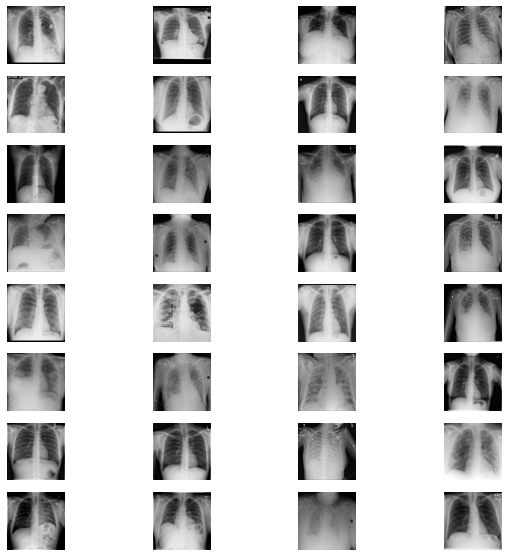

In [6]:
#CLASS_NAMES = np.array([item.name for item in train_dir if item.name != '.ipynb_checkpoints'])
CLASS_NAMES = np.array(os.listdir(train_dir))
print("Class Names: " + str(CLASS_NAMES))

%tensorflow_version 1.x
import tensorflow as tf
# The 1./255 is to convert from uint8 to float32 in range [0,1].
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
image_count_train = len(os.listdir(train_dir_cov))+len(os.listdir(train_dir_ncov))
image_count_dev = len(os.listdir(dev_dir_cov))+len(os.listdir(dev_dir_ncov))
image_count_test = len(os.listdir(test_dir_cov))+len(os.listdir(test_dir_ncov))
##Getting images just for train for now. Will get the other in later. But use the train first to test some type of model to see baseline errors 
BATCH_SIZE = 32
IMG_HEIGHT = 640
IMG_WIDTH = 640
STEPS_PER_EPOCH_train = np.ceil(image_count_train/BATCH_SIZE)
STEPS_PER_EPOCH_test = np.ceil(image_count_test/BATCH_SIZE)
STEPS_PER_EPOCH_val = np.ceil(image_count_dev/BATCH_SIZE)

train_data_gen = image_generator.flow_from_directory(directory=str(train_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES),
                                                     class_mode = "binary")

test_data_gen = image_generator.flow_from_directory(directory=str(test_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES),
                                                     class_mode = "binary")

val_data_gen = image_generator.flow_from_directory(directory=str(dev_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES),
                                                     class_mode = "binary")




def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(BATCH_SIZE):
      ax = plt.subplot(8,4,n+1)
      plt.imshow(image_batch[n],cmap='binary')
      #plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      #plt.title(CLASS_NAMES[label_batch[n]==1.])
      plt.axis('off')

print(val_data_gen)
image_batch, label_batch = next(train_data_gen)
#print(CLASS_NAMES)
#print(label_batch)
show_batch(image_batch, label_batch)

In [7]:
from tensorflow.keras import layers, datasets, models



# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
#img_input = tf.keras.Input(shape=(640, 640, 3))
#input shape moved into first Conv2D layer
model=models.Sequential()
# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
model.add(layers.Conv2D(16, 3, activation='relu', input_shape=(640, 640, 3)))
model.add(layers.MaxPooling2D(2))

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPooling2D(2))

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
model.add(layers.Conv2D(64, 3, activation='relu'))
model.add(layers.MaxPooling2D(2))

# Flatten feature map to a 1-dim tensor so we can add fully connected layers
model.add(layers.Flatten())

# Create a fully connected layer with ReLU activation and 512 hidden units
model.add(layers.Dense(512, activation='relu'))

# Create output layer with a single node and sigmoid activation
model.add(layers.Dense(1, activation='sigmoid'))

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
#model = Model(img_input, output)

#Print summar of the model
model.summary()


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 638, 638, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 319, 319, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 317, 317, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 158, 158, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 156, 156, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 78, 78, 64)        0         
_________________________________________

In [8]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from sklearn.utils import class_weight
import numpy as np

from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

import torchsummary
from tqdm import tqdm
import datetime,os

model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False),
              metrics=['acc', tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), 
                       tf.keras.metrics.FalsePositives(), tf.keras.metrics.FalseNegatives(), 
                       tf.keras.metrics.TruePositives(), tf.keras.metrics.TrueNegatives()])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
# Load Tensorboard
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
%load_ext tensorboard
%tensorboard --logdir ./runs

Reusing TensorBoard on port 6006 (pid 413), started 0:44:00 ago. (Use '!kill 413' to kill it.)

In [10]:
history = model.fit(
      train_data_gen,
      steps_per_epoch=STEPS_PER_EPOCH_train,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=val_data_gen,
      validation_steps=STEPS_PER_EPOCH_test,  # 1000 images = batch_size * steps
      callbacks=[tensorboard_callback],verbose=2)

Epoch 1/15
Epoch 1/15
28/28 - 99s - loss: 3.7930 - acc: 0.7913 - recall: 0.9071 - precision: 0.8566 - false_positives: 116.0000 - false_negatives: 71.0000 - true_positives: 693.0000 - true_negatives: 16.0000 - val_loss: 0.6517 - val_acc: 0.5455 - val_recall: 0.9818 - val_precision: 0.5243 - val_false_positives: 49.0000 - val_false_negatives: 1.0000 - val_true_positives: 54.0000 - val_true_negatives: 6.0000
Epoch 2/15
Epoch 1/15
28/28 - 89s - loss: 0.3975 - acc: 0.8661 - recall: 0.9882 - precision: 0.8718 - false_positives: 111.0000 - false_negatives: 9.0000 - true_positives: 755.0000 - true_negatives: 21.0000 - val_loss: 0.8681 - val_acc: 0.5818 - val_recall: 0.9818 - val_precision: 0.5455 - val_false_positives: 45.0000 - val_false_negatives: 1.0000 - val_true_positives: 54.0000 - val_true_negatives: 10.0000
Epoch 3/15
Epoch 1/15
28/28 - 89s - loss: 0.2563 - acc: 0.8996 - recall: 0.9686 - precision: 0.9181 - false_positives: 66.0000 - false_negatives: 24.0000 - true_positives: 740.0000

In [11]:
%tensorboard --logdir logs

In [12]:
!pip install keract

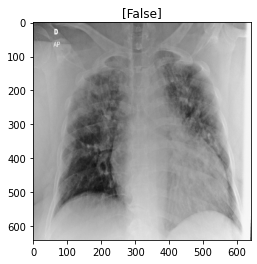

In [20]:
test_image_batch, test_label_batch= next(test_data_gen)
test_image = test_image_batch[1]
plt.title([test_label_batch[1]==1])
plt.imshow(test_image,cmap='binary')

In [21]:
test_image = np.expand_dims(test_image, axis=0)
model.predict(test_image)

array([[0.4097887]], dtype=float32)

conv2d (1, 638, 638, 16) 


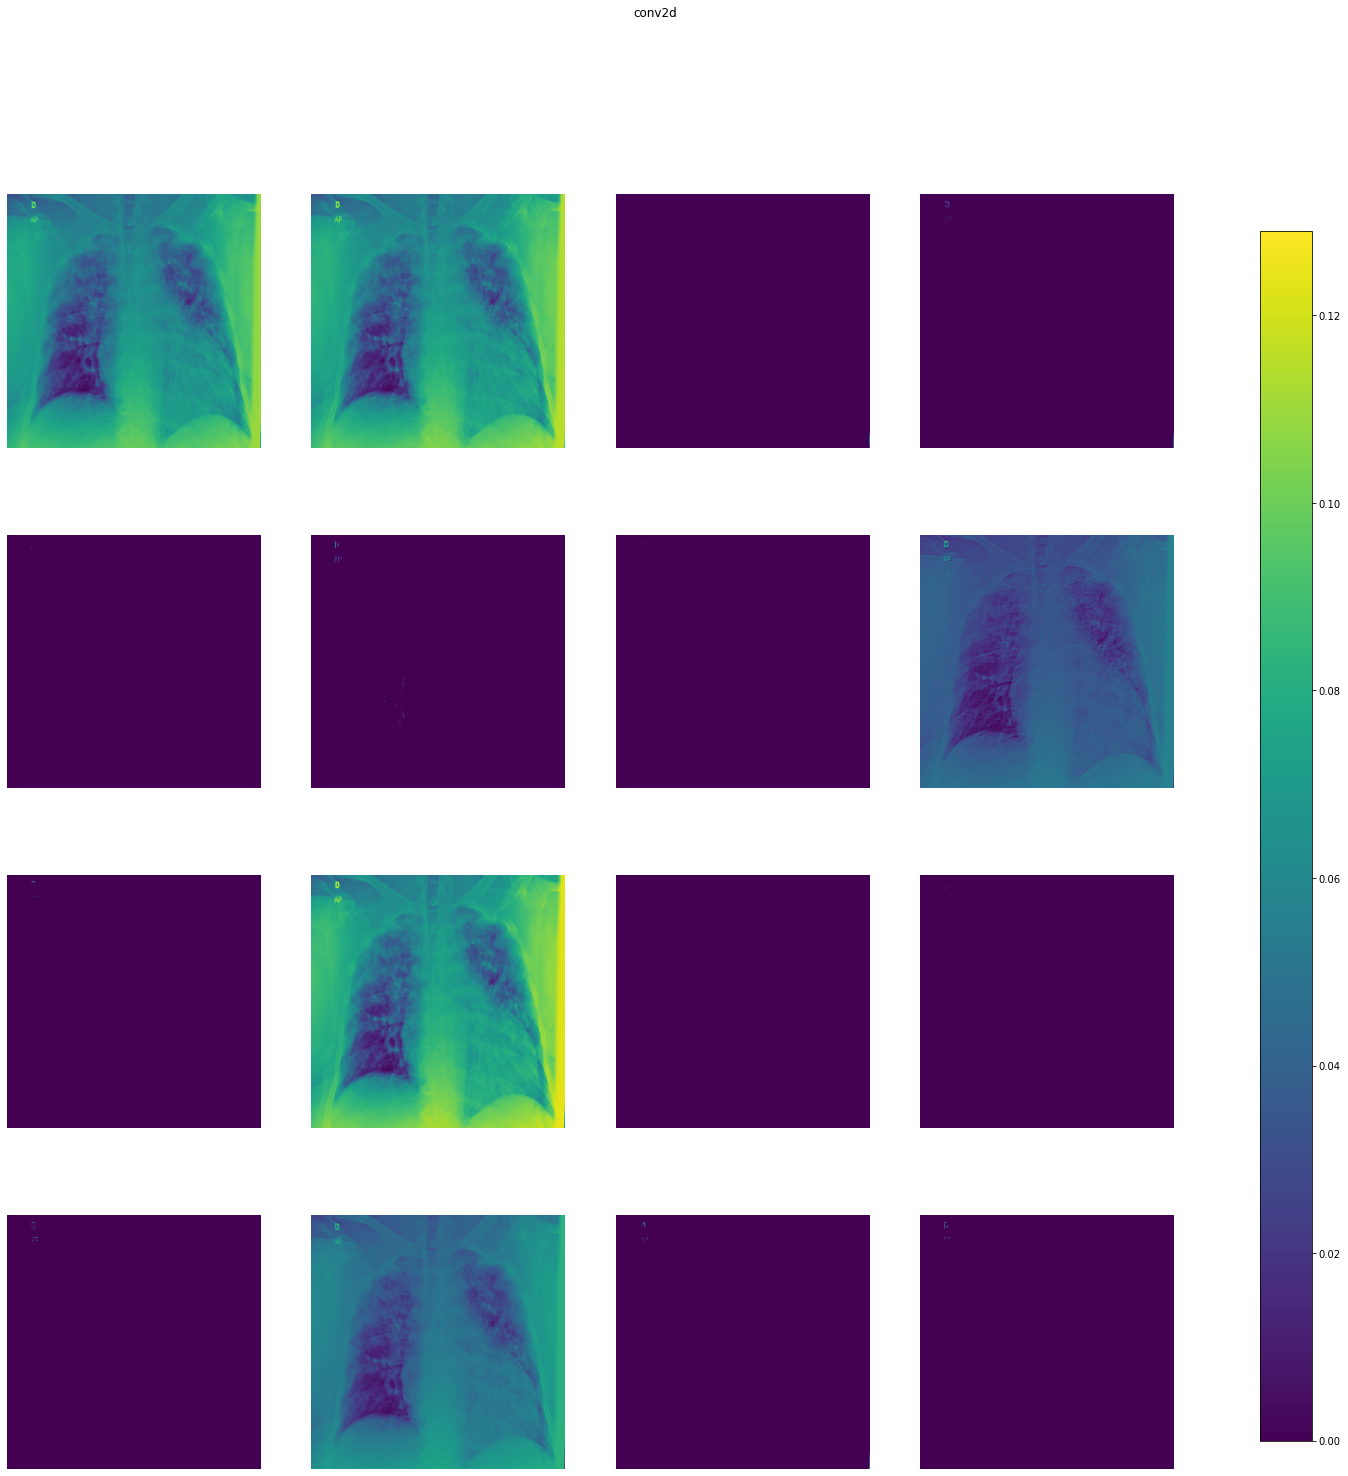

max_pooling2d (1, 319, 319, 16) 


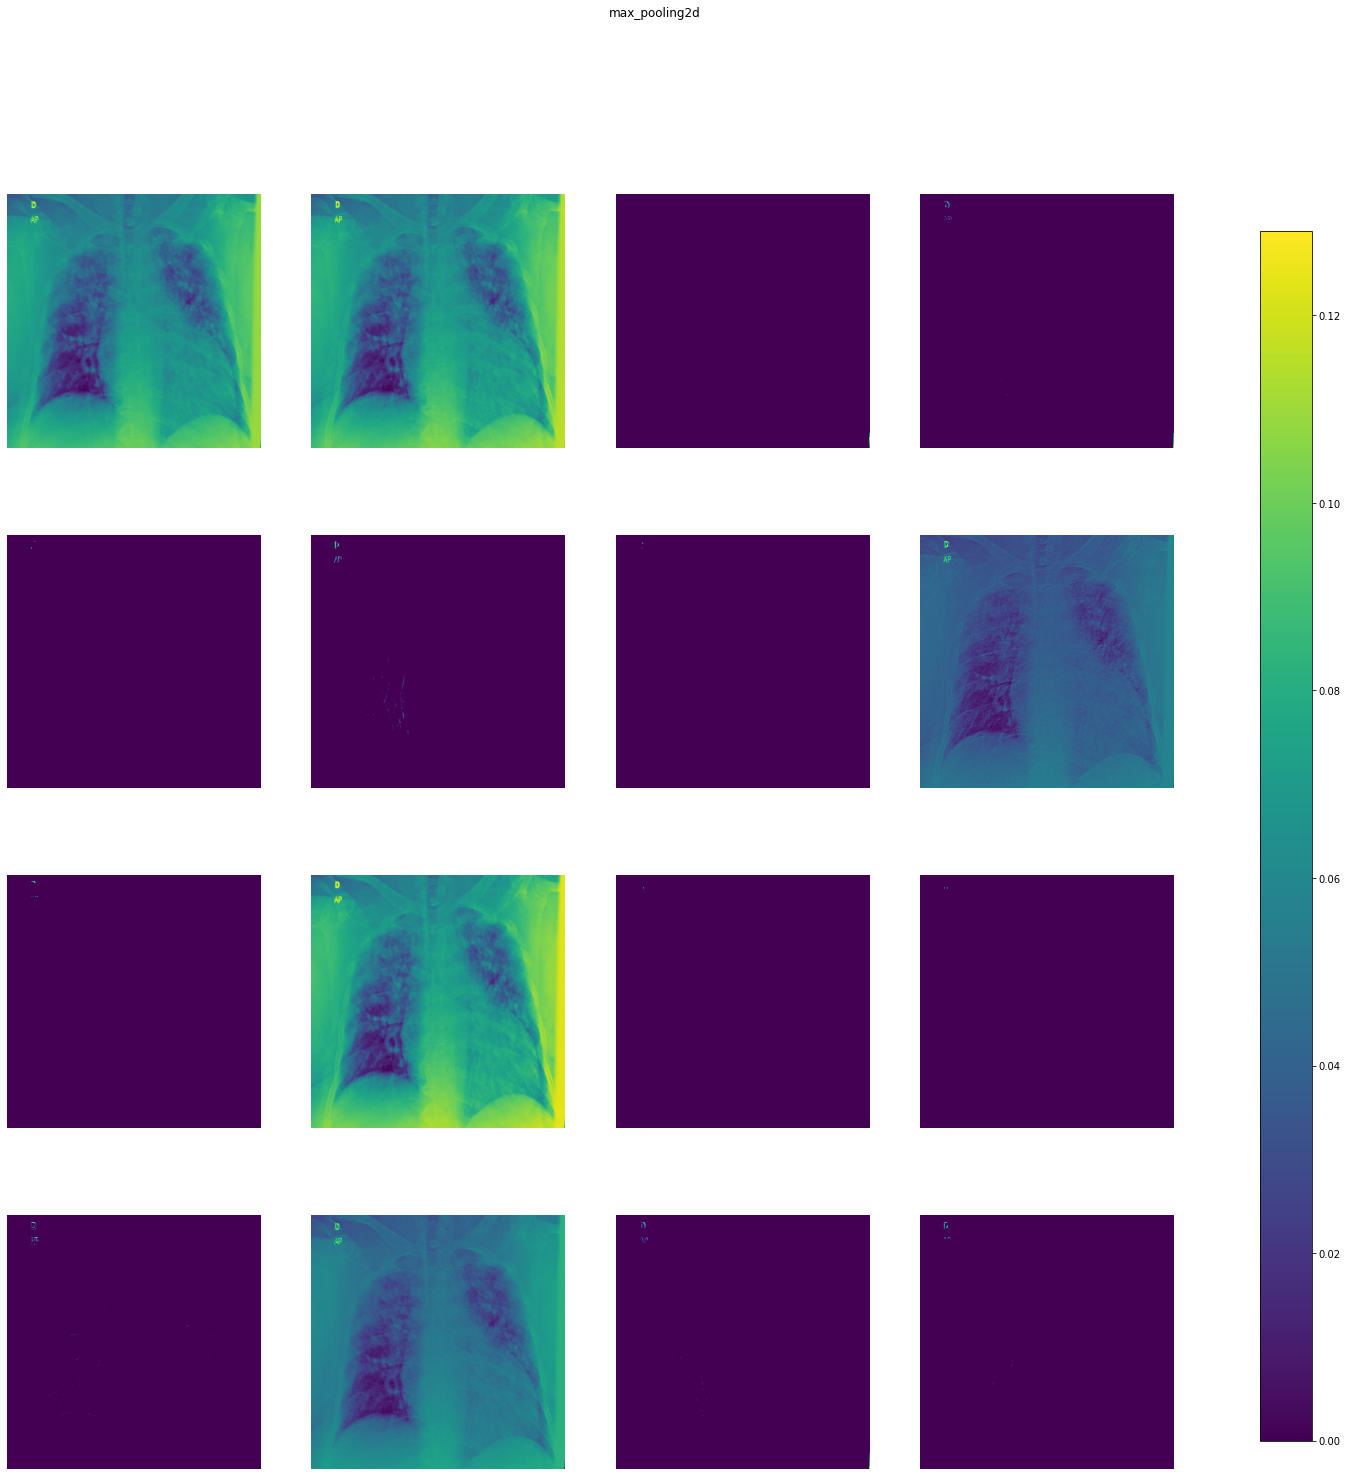

conv2d_1 (1, 317, 317, 32) 


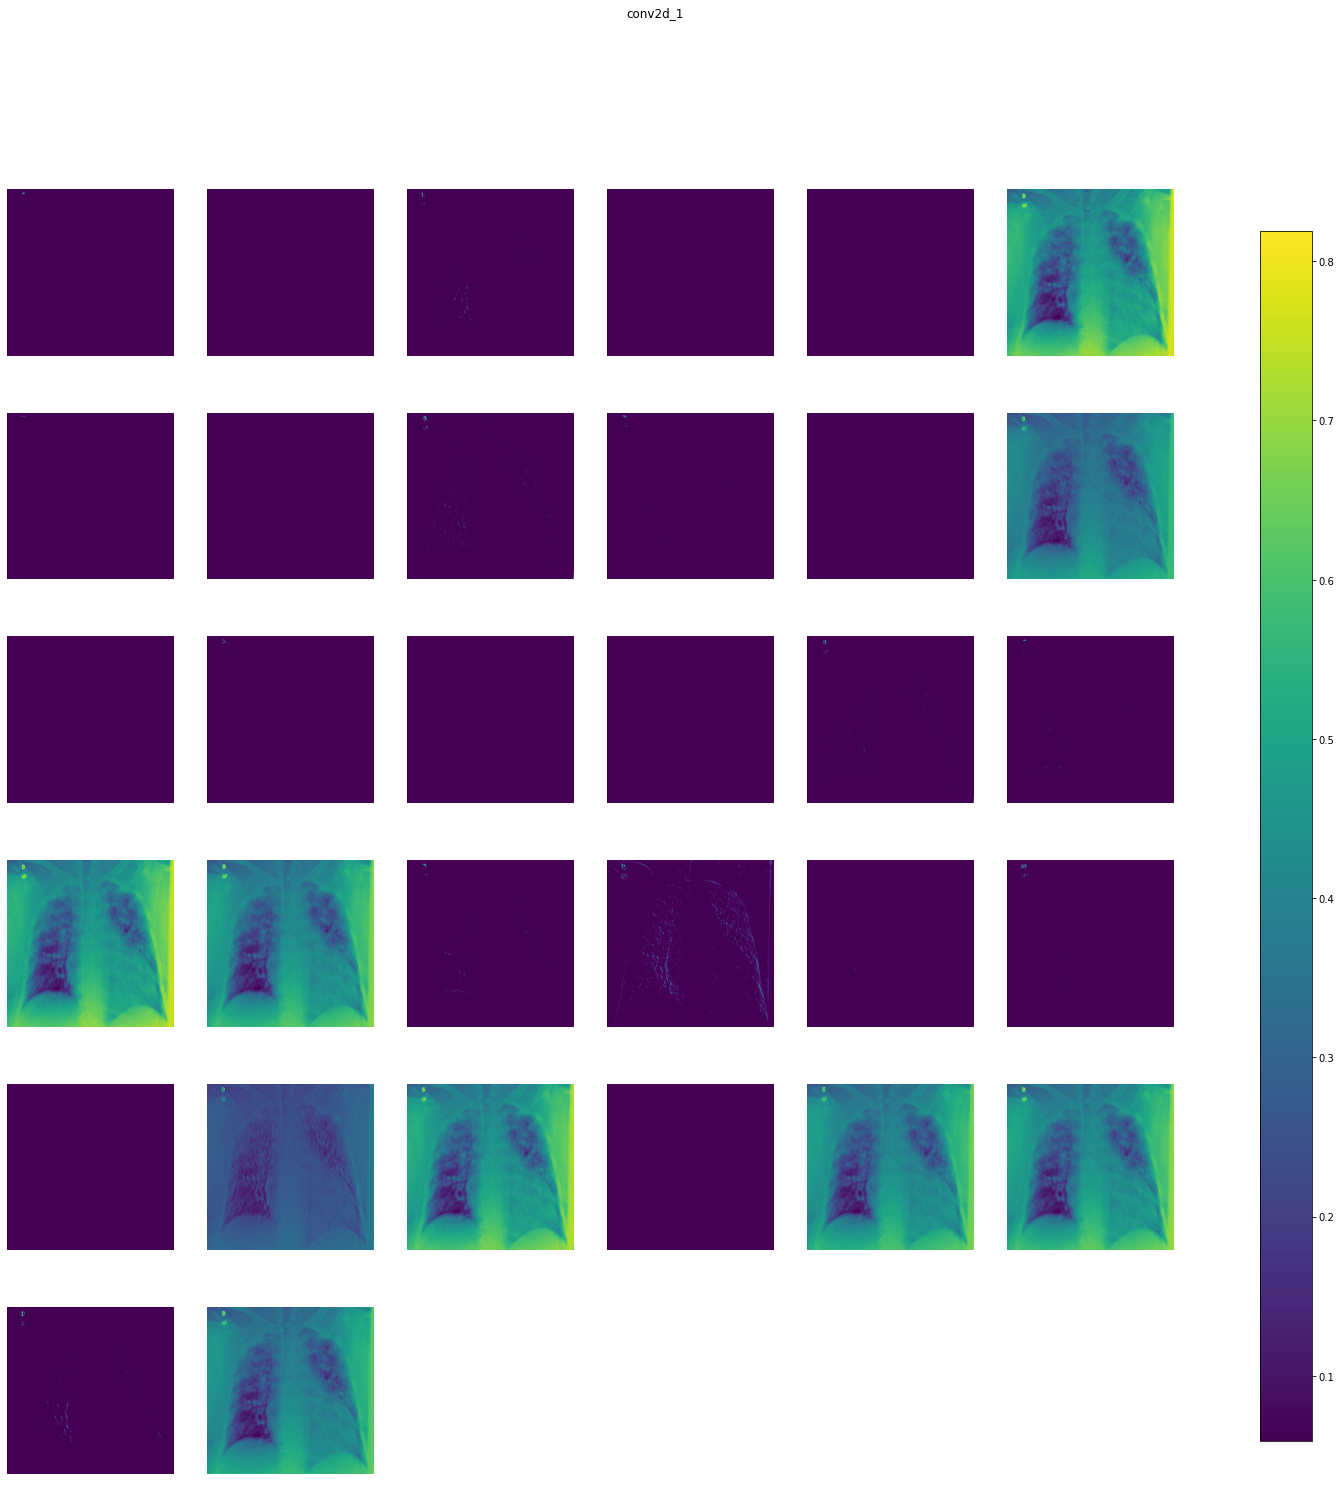

max_pooling2d_1 (1, 158, 158, 32) 


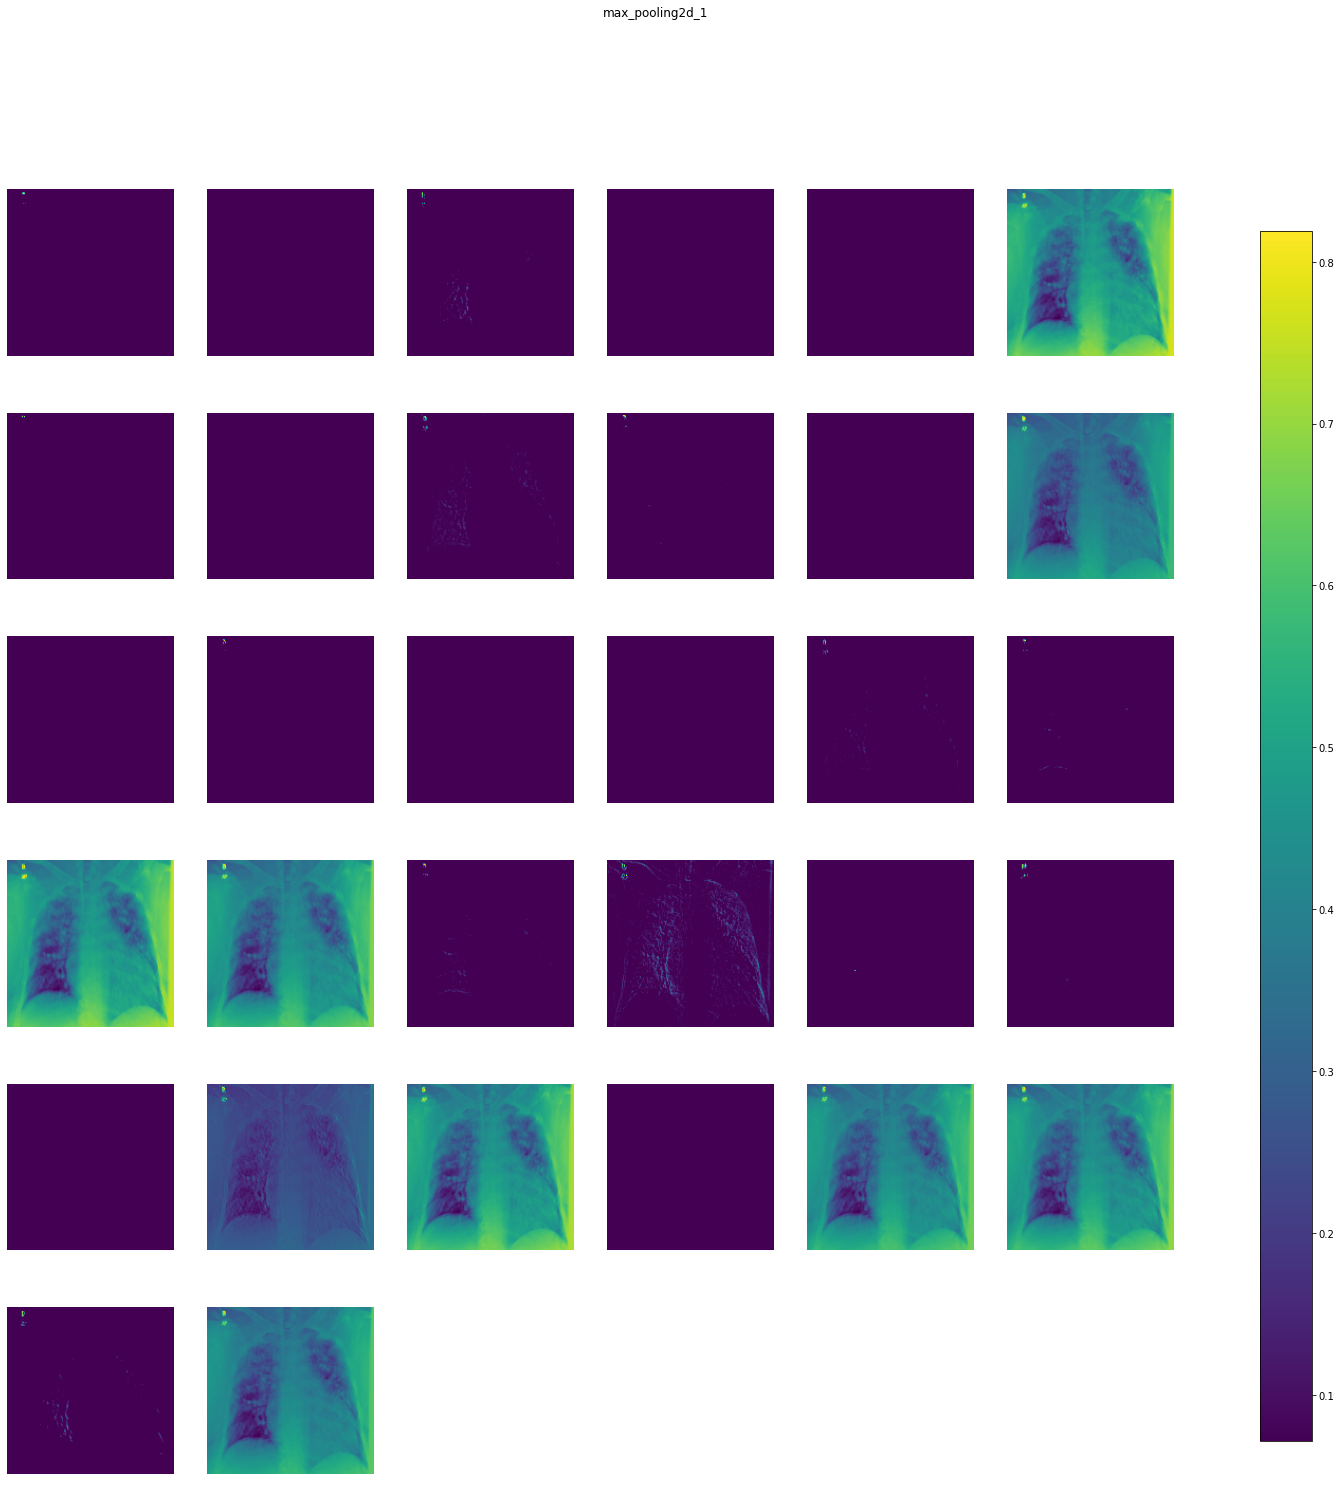

conv2d_2 (1, 156, 156, 64) 


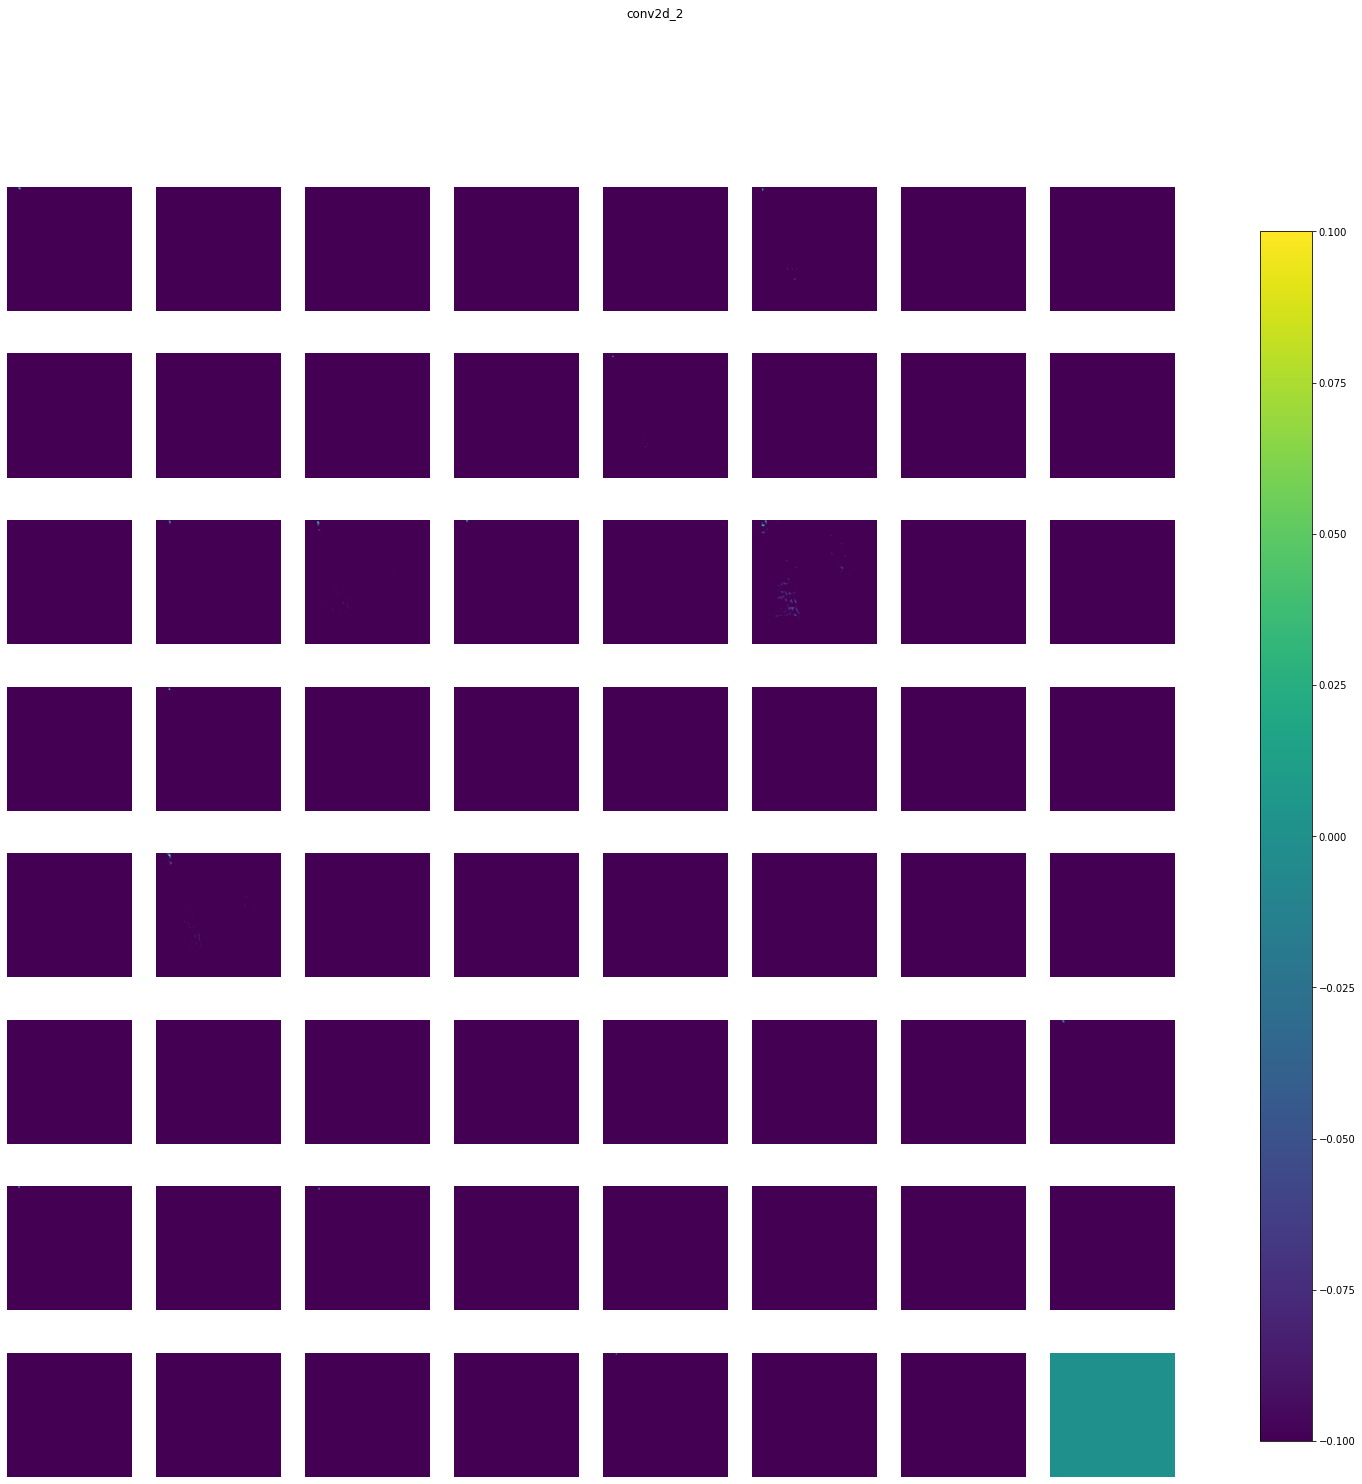

max_pooling2d_2 (1, 78, 78, 64) 


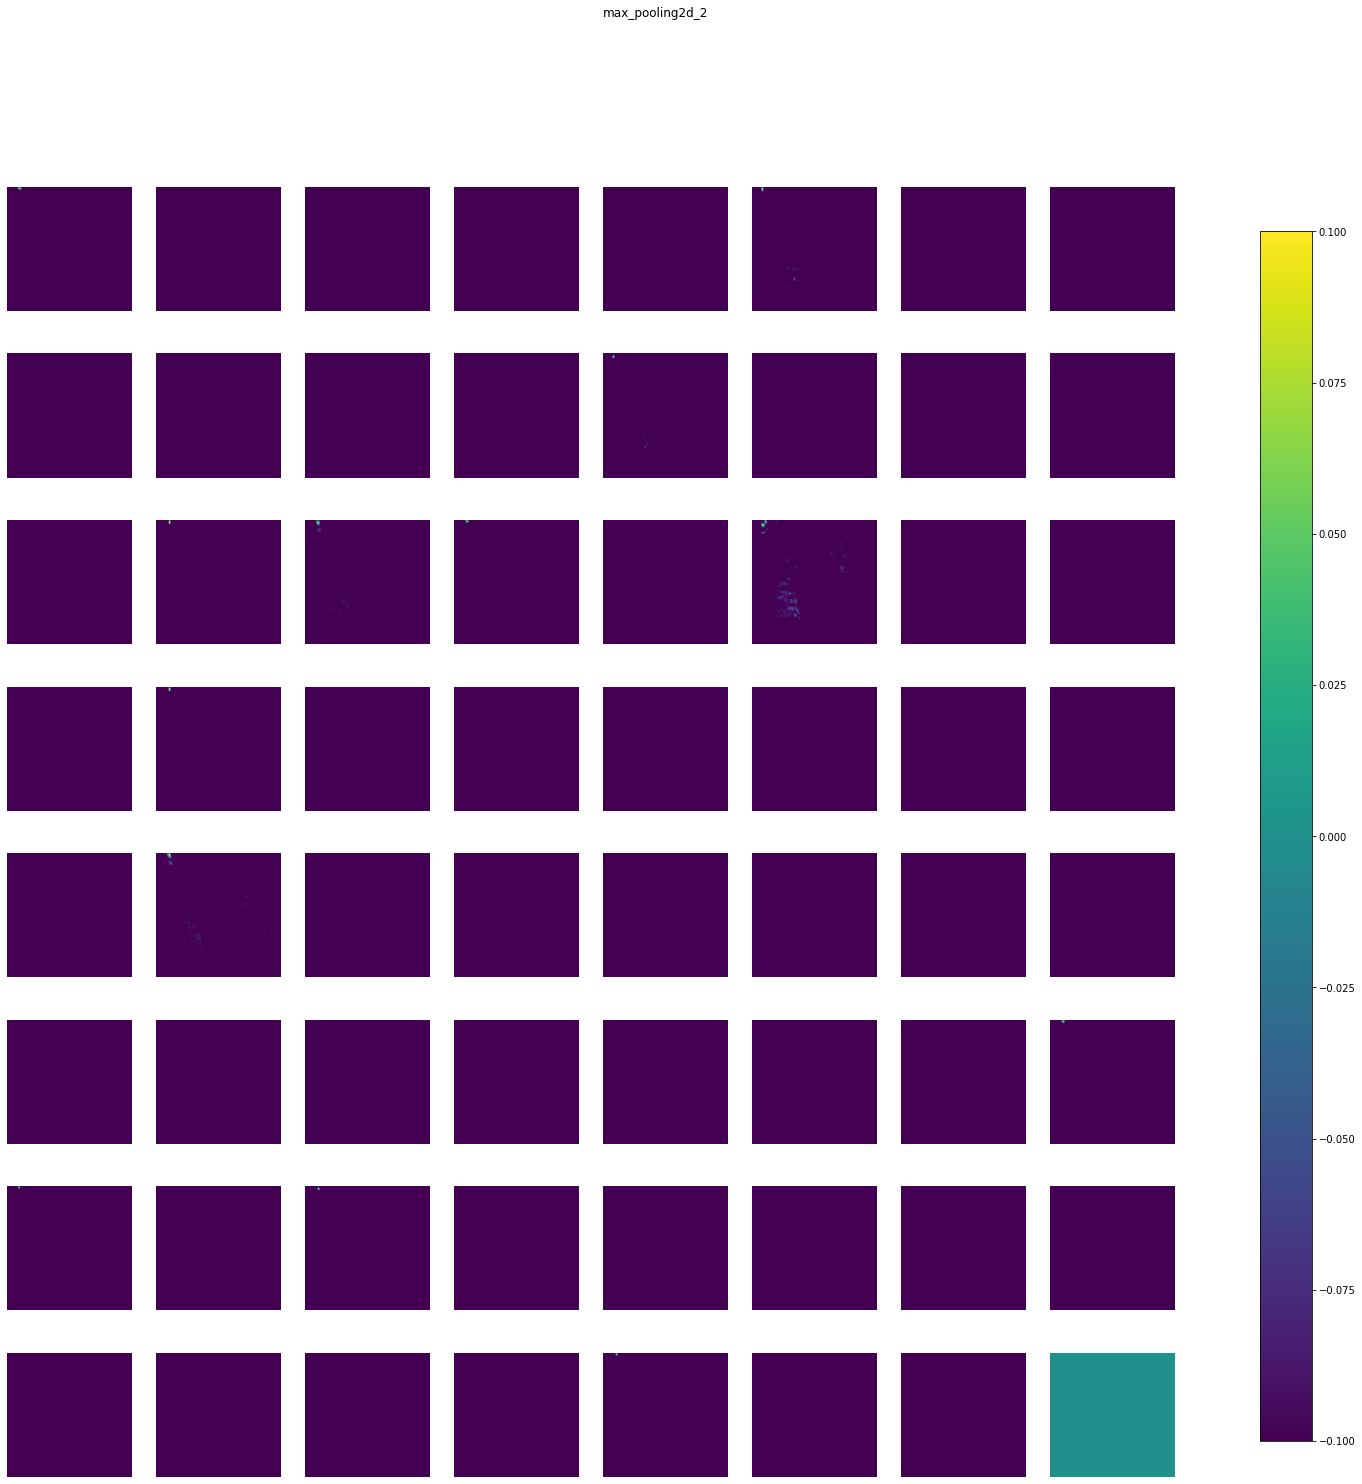

flatten (1, 389376) 


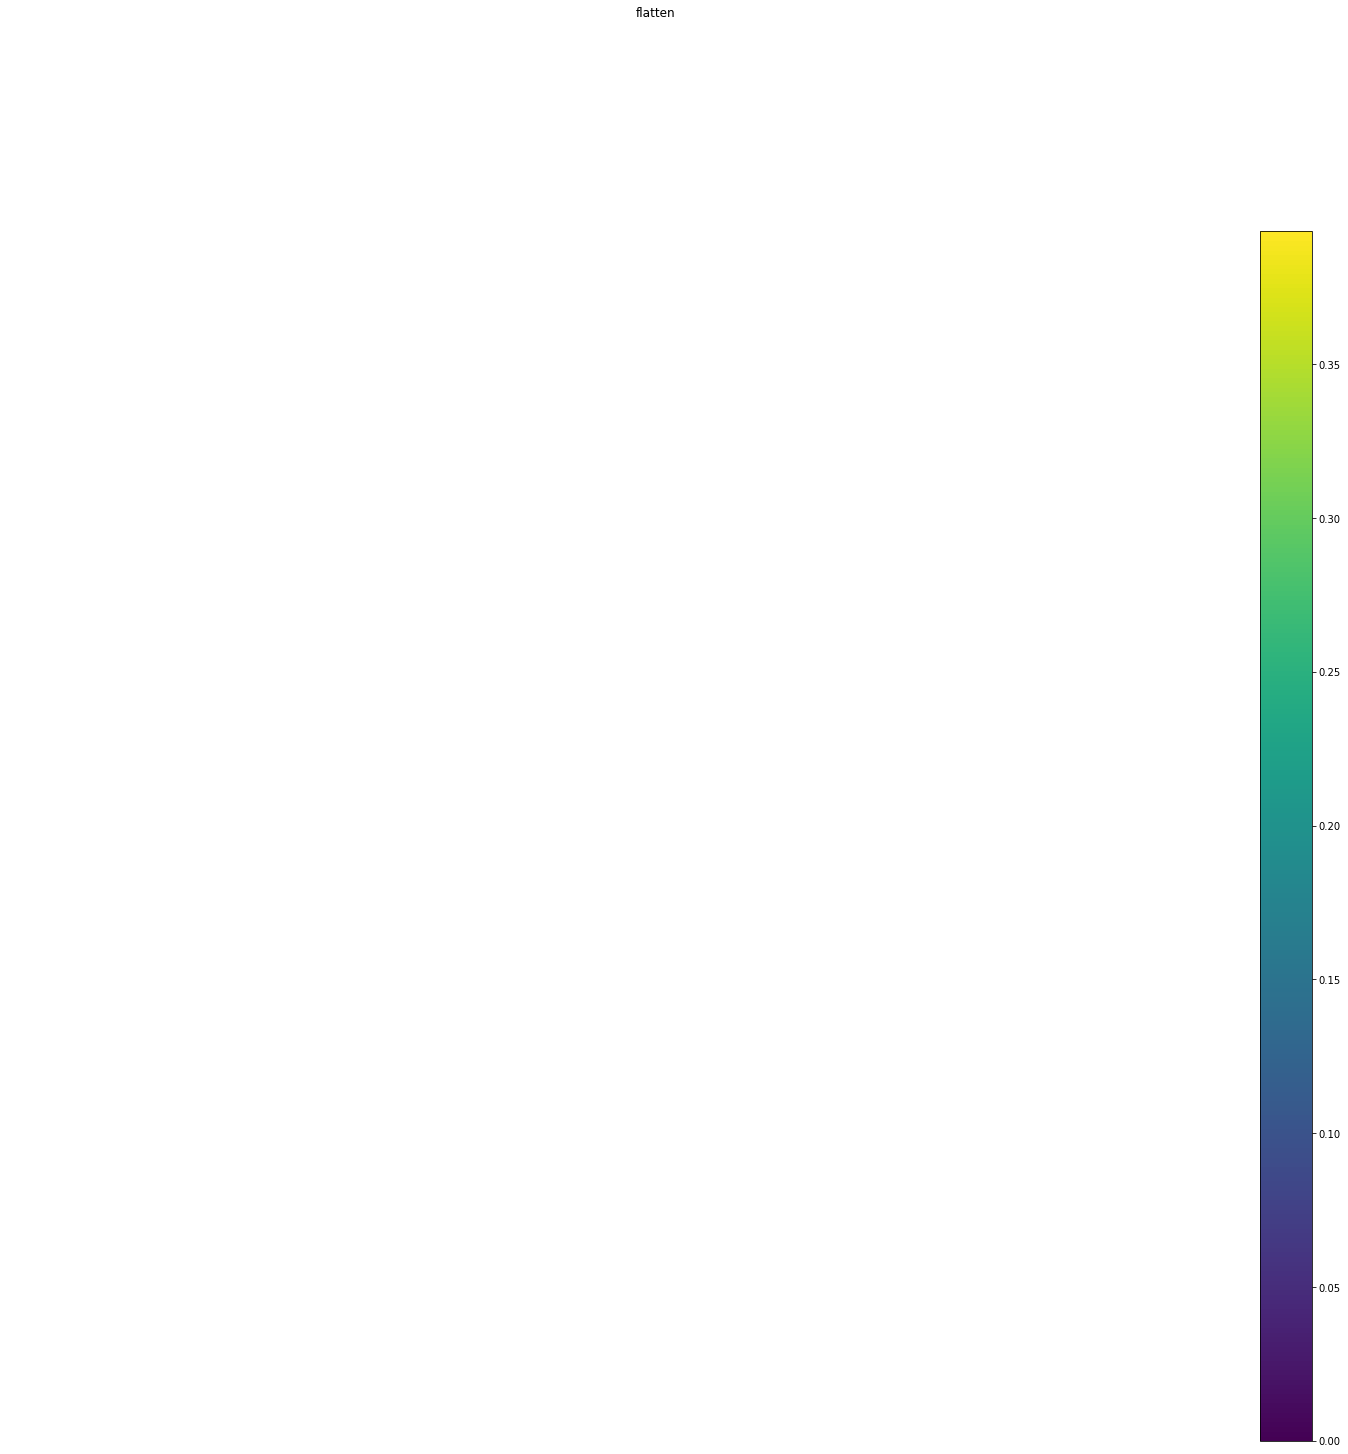

dense (1, 512) 


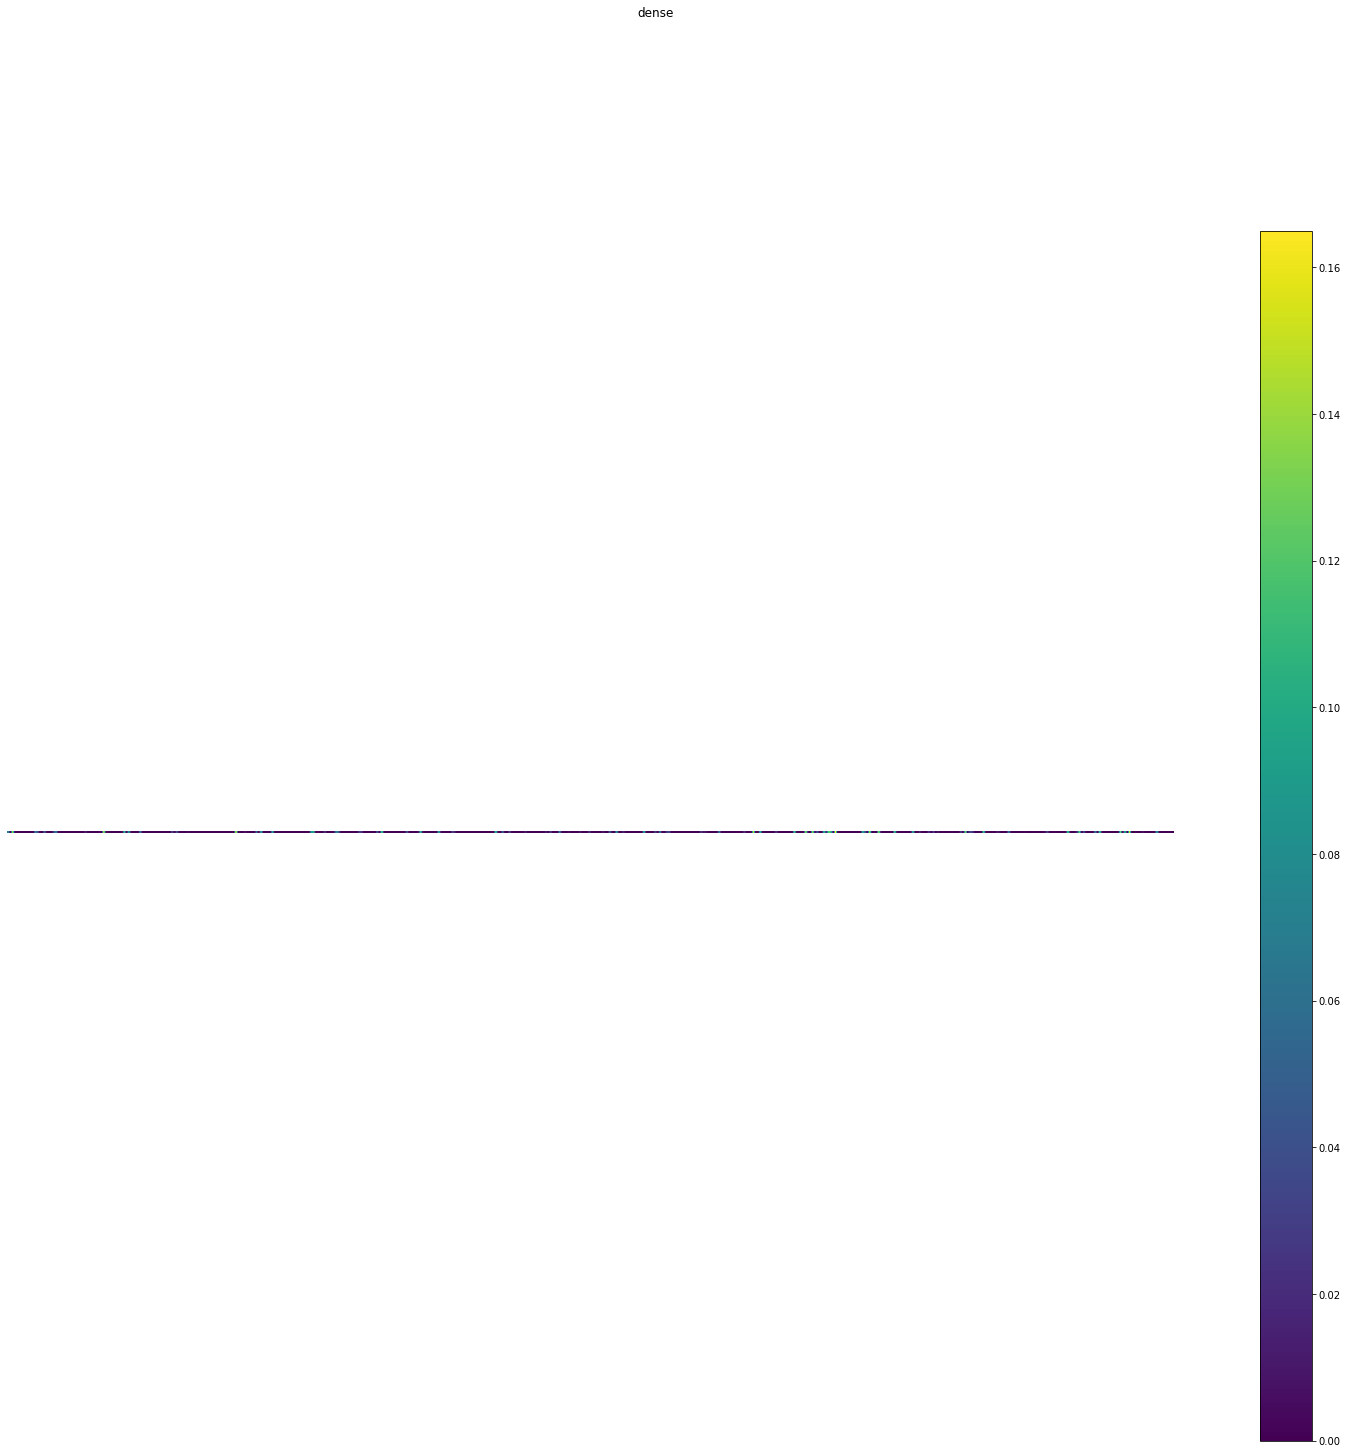

dense_1 (1, 1) 


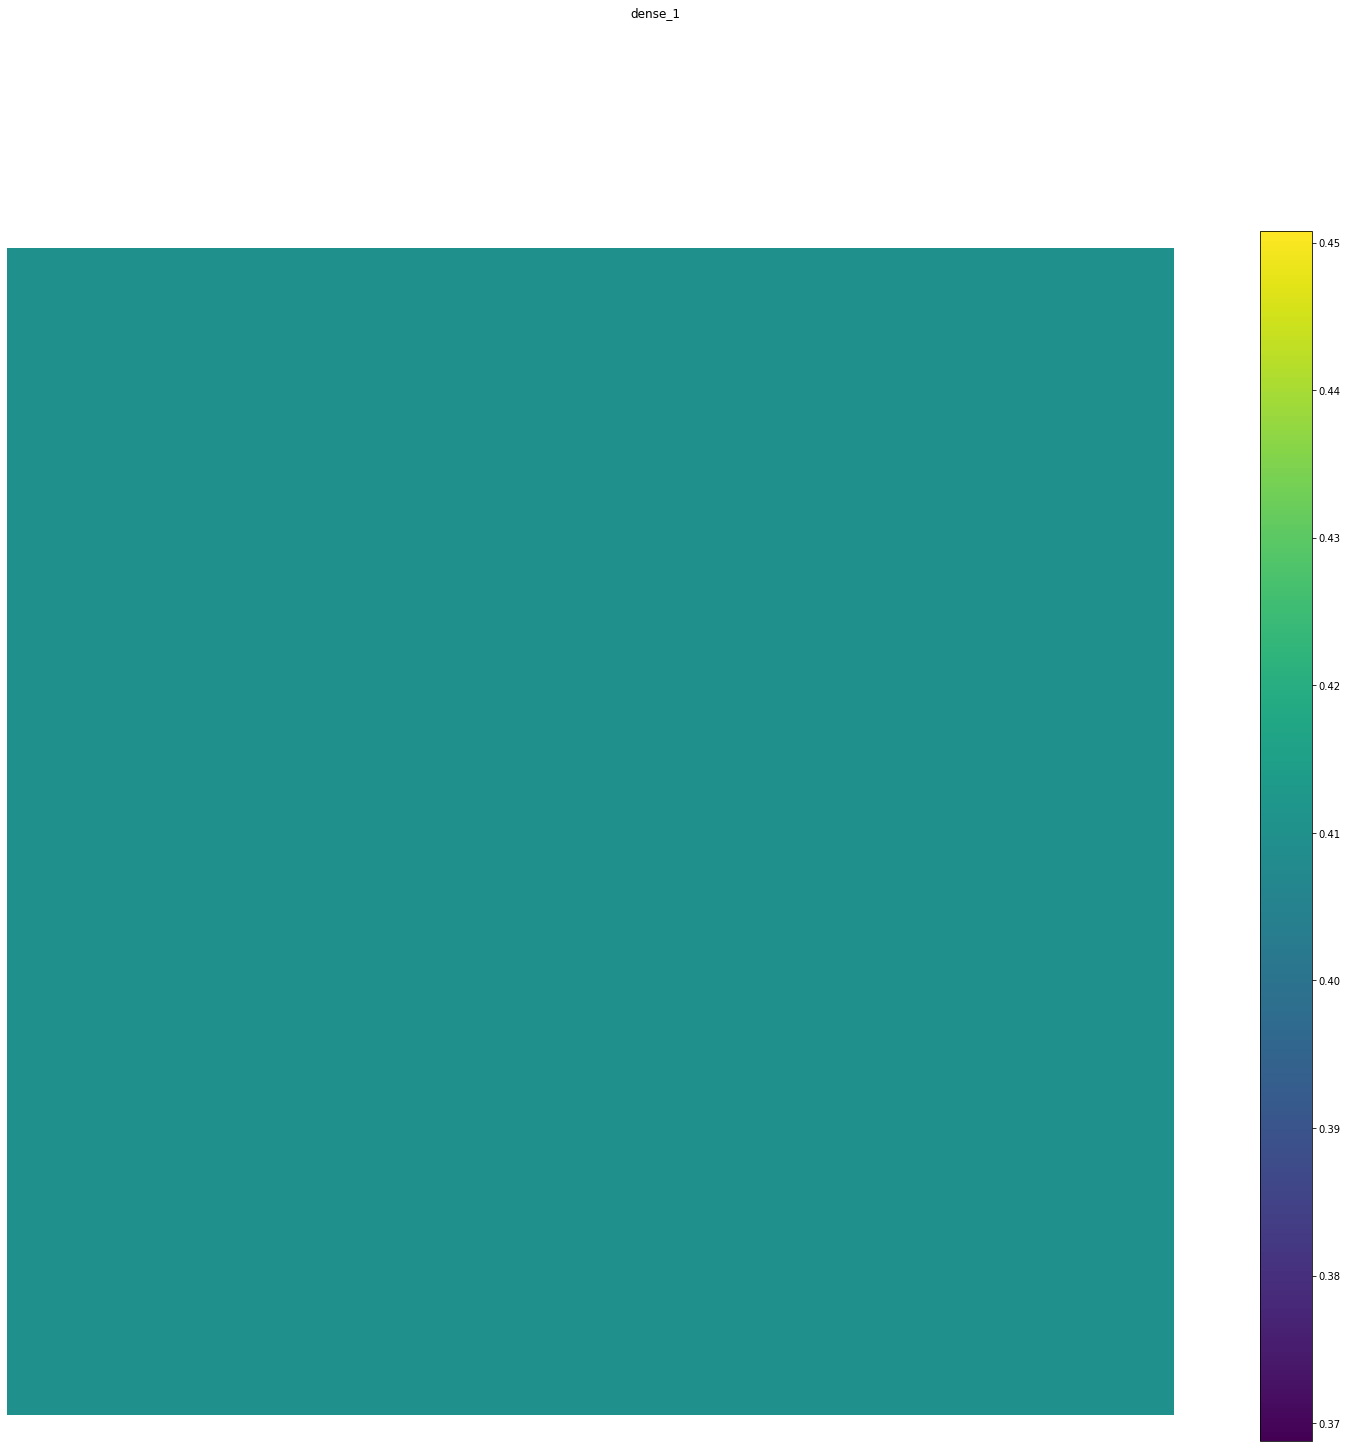

In [22]:
from keract import get_activations, display_heatmaps, display_activations

activations = get_activations(model, test_image)
display_activations(activations=activations)

conv2d (1, 638, 638, 16) 


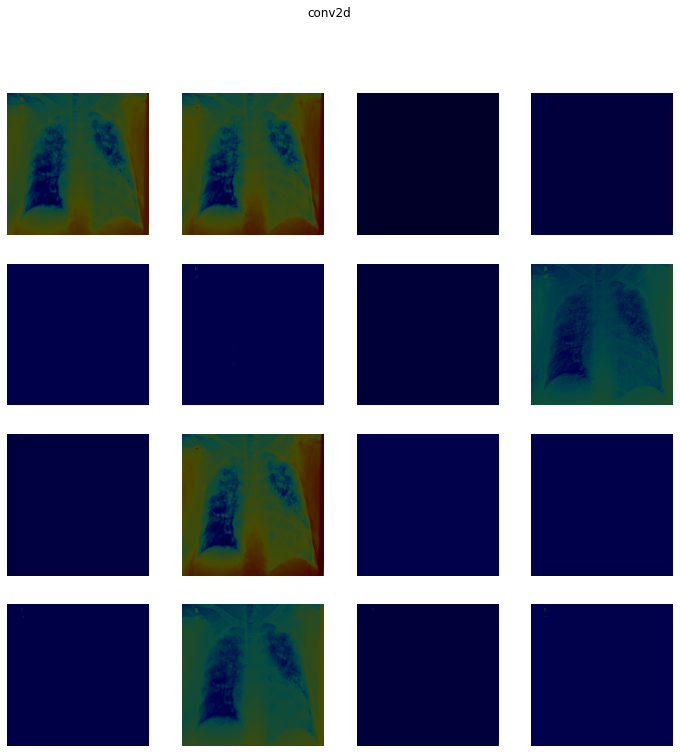

max_pooling2d (1, 319, 319, 16) 


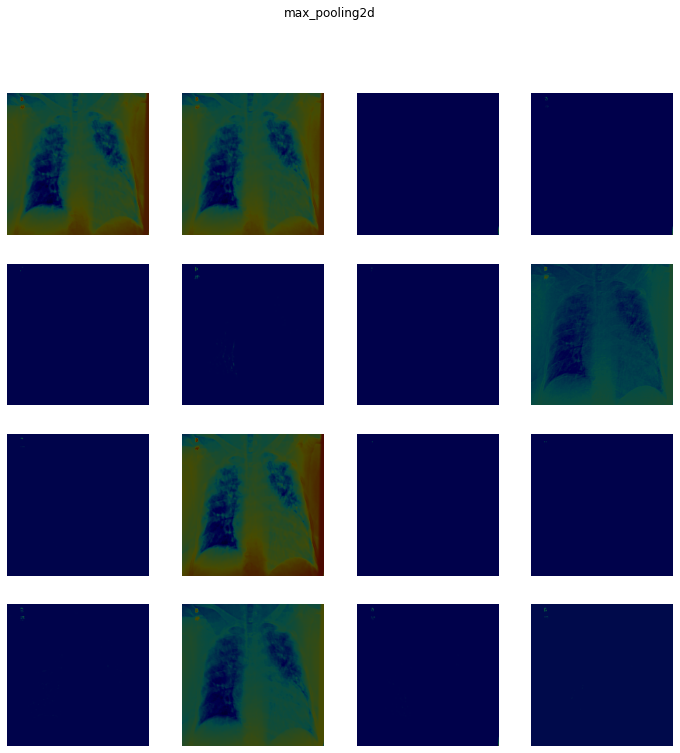

conv2d_1 (1, 317, 317, 32) 


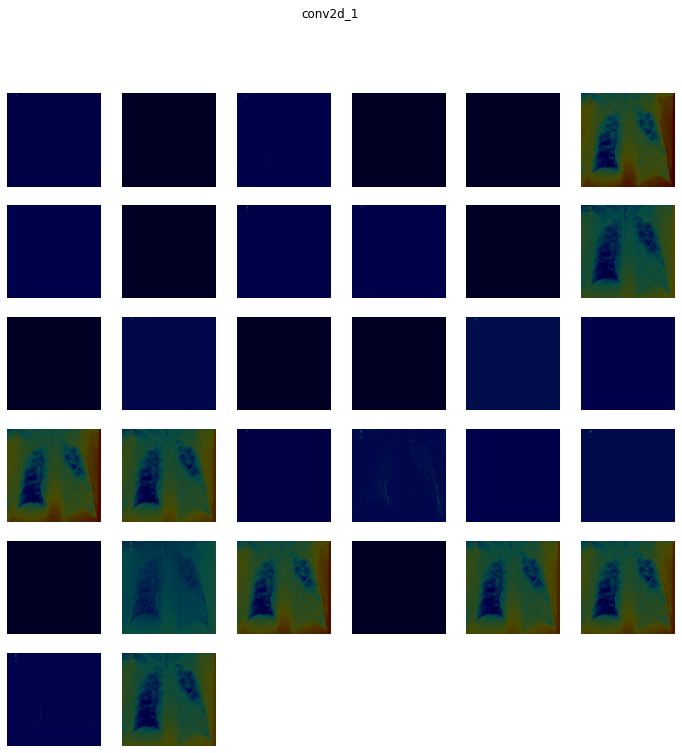

max_pooling2d_1 (1, 158, 158, 32) 


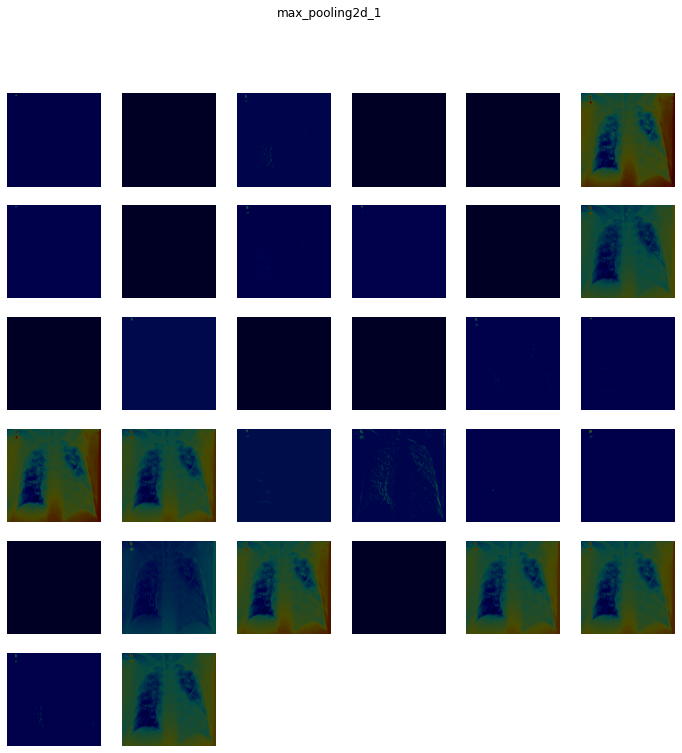

conv2d_2 (1, 156, 156, 64) 


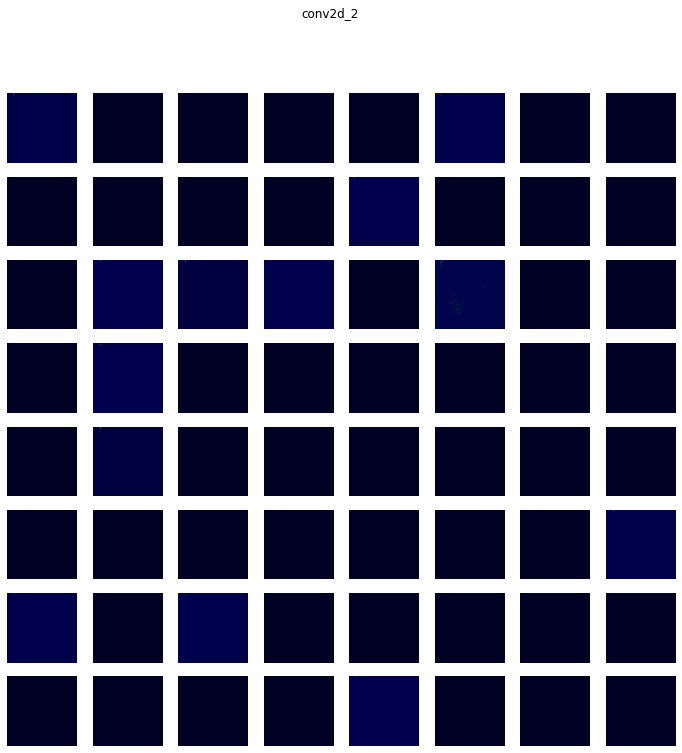

max_pooling2d_2 (1, 78, 78, 64) 


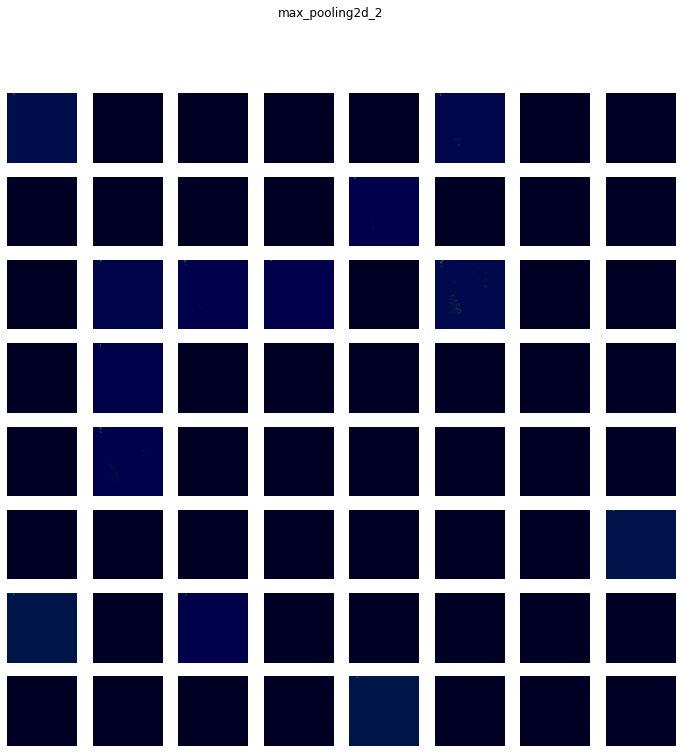

flatten (1, 389376) -> Skipped. 2D Activations.
dense (1, 512) -> Skipped. 2D Activations.
dense_1 (1, 1) -> Skipped. 2D Activations.


In [23]:
display_heatmaps(activations, test_image, save=False)

In [0]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')
#plt.ylim((0.5,1.5))